# Predicción de resultado y marcador de LIX Super Bowl 2025

**Disclaimer**: *Este trabajo utiliza una base de datos de Kaggle llamada 2017-2024 scores.csv que subió el usuario Keoni Mortensen. Lo hice rápido, como una actividad adicional. Mi intención no es proveer un análisis exhaustivo, ni completamente escalable, sino poder hacer una educated guess de los resultados del Super Bowl 2025. Dicho esto, disfruten la lectura :)*

Me he propuesto no tomar mas de 25 min

Okay, entonces son dos cosas:
1. Ver como podría quedar un marcador de super bowl
2. Ver quien podría ganar

El primero se me hace más fácil. Basta con establecer un rango con el cual trabajar

# Exploracion

In [59]:
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# cargar y explorar datos
df = pd.read_csv('2017-2024_scores.csv')
df.head()

,Season,Week,GameStatus,Day,Date,AwayTeam,AwayRecord,AwayScore,AwayWin,HomeTeam,HomeRecord,HomeScore,HomeWin,AwaySeeding,HomeSeeding,PostSeason
0,2017,Hall Of Fame,FINAL,THU,08/03,Cardinals,0-1,18.0,0.0,Cowboys,1-0,20.0,1.0,NaN,NaN,0
1,2017,Preseason Week 1,FINAL,WED,08/09,Texans,0-1,17.0,0.0,Panthers,1-0,27.0,1.0,NaN,NaN,0
2,2017,Preseason Week 1,FINAL,THU,08/10,Vikings,1-0,17.0,1.0,Bills,0-1,10.0,0.0,NaN,NaN,0
3,2017,Preseason Week 1,FINAL,THU,08/10,Falcons,0-1,20.0,0.0,Dolphins,1-0,23.0,1.0,NaN,NaN,0
4,2017,Preseason Week 1,FINAL,THU,08/10,Redskins,0-1,3.0,0.0,Ravens,1-0,23.0,1.0,NaN,NaN,0


In [61]:
exploration = df

In [62]:
superBowl = exploration[exploration["Week"] == "Super Bowl"]
print(superBowl)

      Season        Week GameStatus  Day   Date  AwayTeam AwayRecord  \
364     2017  Super Bowl      FINAL  SUN  02/04    Eagles       13-3   
729     2018  Super Bowl      FINAL  SUN  02/03  Patriots       11-5   
1094    2019  Super Bowl      FINAL  SUN  02/02     49ers       13-3   
1395    2020  Super Bowl      FINAL  SUN  02/07    Chiefs       14-2   
1762    2021  Super Bowl      FINAL  SUN  02/13      Rams       12-5   
2128    2022  Super Bowl      FINAL  SUN  02/12    Chiefs       14-3   
2494    2023  Super Bowl      FINAL  SUN  02/11     49ers       12-5   
2860    2024  Super Bowl   UPCOMING  SUN  02/09    Chiefs       15-2   

      AwayScore  AwayWin    HomeTeam HomeRecord  HomeScore  HomeWin  \
364        41.0      1.0    Patriots       13-3       33.0      0.0   
729        13.0      1.0        Rams       13-3        3.0      0.0   
1094       20.0      0.0      Chiefs       12-4       31.0      1.0   
1395        9.0      0.0  Buccaneers       11-5       31.0      1.0

In [63]:
# quitar columnas que no me interesan de momento
labelsToRemove = ["Season", "GameStatus", "Day", "Date", "AwaySeeding","AwayRecord", "HomeSeeding", "PostSeason", "Week", "AwayTeam", "AwayWin", "HomeTeam", "HomeRecord", "HomeWin"]
df = df.drop(labels=labelsToRemove, axis=1)
df.head()

,AwayScore,HomeScore
0,18.0,20.0
1,17.0,27.0
2,17.0,10.0
3,20.0,23.0
4,3.0,23.0


# Box plot de puntajes

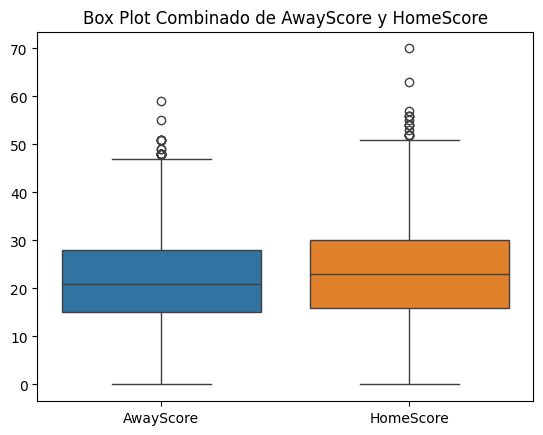

In [64]:
sns.boxplot(data=[df['AwayScore'], df['HomeScore']])
plt.title('Box Plot Combinado de AwayScore y HomeScore')
plt.xticks([0, 1], ['AwayScore', 'HomeScore'])  # Etiquetas para el eje x
plt.show()

Con esto al menos puedo decir, que no debería esperar que el **Home sea mayor a 50**, ni que el **Away sea mayor a 46**

# Histograma de puntuaciones

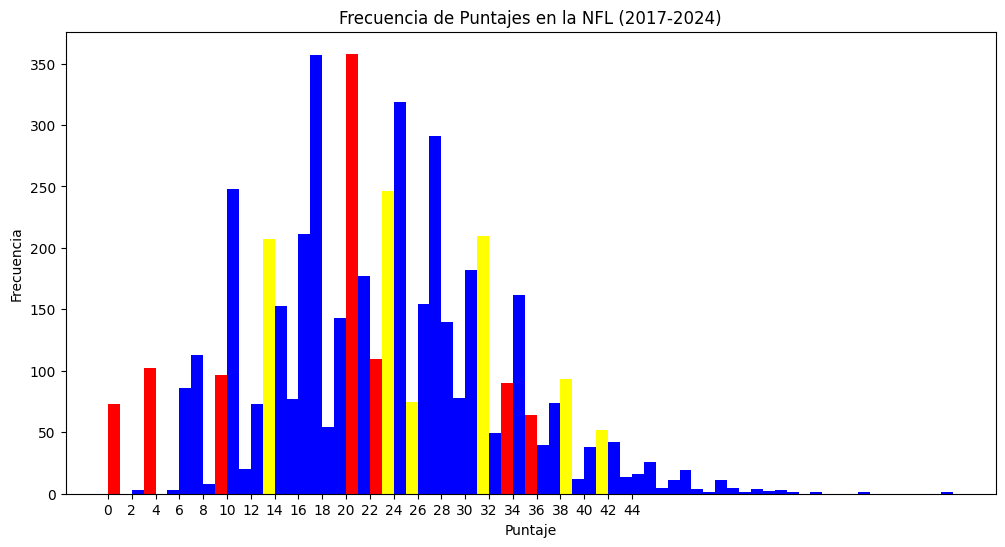

In [67]:
# Suponiendo que tu DataFrame se llama 'df' y las columnas son 'AwayScore' y 'HomeScore'
# Combinamos los puntajes de ambos equipos en una sola serie
df = pd.read_csv('2017-2024_scores.csv')
all_scores = pd.concat([df['AwayScore'], df['HomeScore']], ignore_index=True)

# Filtramos los puntajes del Super Bowl
super_bowl_df = df[df["Week"] == "Super Bowl"]
winning_scores = super_bowl_df[super_bowl_df["AwayWin"] == 1]["AwayScore"].tolist() + super_bowl_df[super_bowl_df["HomeWin"] == 1]["HomeScore"].tolist()
losing_scores = super_bowl_df[super_bowl_df["AwayWin"] == 0]["AwayScore"].tolist() + super_bowl_df[super_bowl_df["HomeWin"] == 0]["HomeScore"].tolist()

# Creamos el histograma con colores personalizados
plt.figure(figsize=(12, 6))

# Convert the minimum and maximum scores to integers for range
N, bins, patches = plt.hist(all_scores, bins=range(int(min(all_scores)), int(max(all_scores)) + 2, 1), color='blue')

# Cambiamos el color de las barras según si son puntajes de ganadores o perdedores del Super Bowl
for score, patch in zip(bins, patches):
    if score in winning_scores:
        patch.set_facecolor('yellow')  # Amarillo para ganadores del Super Bowl
    elif score in losing_scores:
        patch.set_facecolor('red')    # Rojo para perdedores del Super Bowl
    # else: #El resto de puntajes ya son azules por defecto.

plt.title('Frecuencia de Puntajes en la NFL (2017-2024)')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.xticks(range(0, 46, 2))
plt.show()

# Histograma de puntajes de playoffs

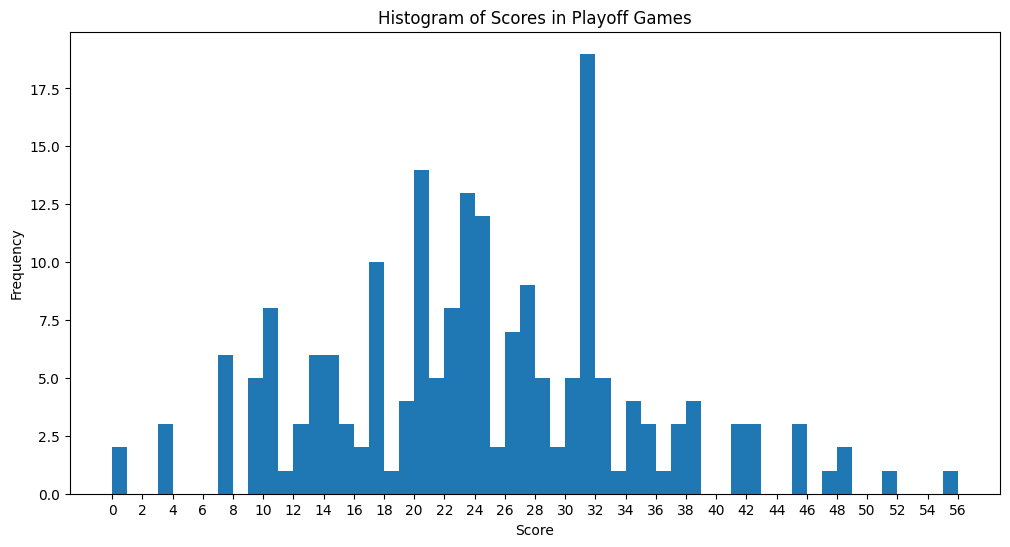

In [78]:
# prompt: frecuencia de puntajes de todos los partidos cuya week diga playoffs o superbowl, sin colores especificos

# Load the dataset
df = pd.read_csv('2017-2024_scores.csv')

# Filter for playoff games (including Super Bowl)
playoff_df = df[df["PostSeason"] == 1]

# Combine scores from both teams
all_scores = pd.concat([playoff_df['AwayScore'], playoff_df['HomeScore']], ignore_index=True)

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(all_scores, bins=range(int(min(all_scores)), int(max(all_scores)) + 2, 1))  # Adjust bins as needed

plt.title('Histogram of Scores in Playoff Games')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks(range(0, int(max(all_scores)) + 2, 2))  # Adjust x-axis ticks if needed
plt.show()


# Diferencias y puntajes en super bowls pasados

In [ ]:
df = pd.read_csv('2017-2024_scores.csv')


In [70]:
# prompt: vuelve a leer el df e imprime las diferencias entre los scores de superbowl. luego dame la diferencia promedio con desvest

# Recargar el DataFrame (si es necesario)
df = pd.read_csv('2017-2024_scores.csv')

# Filtrar para obtener solo los partidos del Super Bowl
super_bowl_df = df[df["Week"] == "Super Bowl"]

# Calcular la diferencia de puntos en cada Super Bowl
super_bowl_df['ScoreDifference'] = abs(super_bowl_df['AwayScore'] - super_bowl_df['HomeScore'])

# Imprimir las diferencias de puntos
print(super_bowl_df[['AwayTeam', 'AwayScore', 'HomeTeam', 'HomeScore', 'ScoreDifference']])

# Calcular la diferencia promedio y la desviación estándar
average_difference = super_bowl_df['ScoreDifference'].mean()
std_dev_difference = super_bowl_df['ScoreDifference'].std()

print(f"\nDiferencia promedio de puntos en el Super Bowl: {average_difference:.2f}")
print(f"Desviación estándar de la diferencia de puntos: {std_dev_difference:.2f}")


      AwayTeam  AwayScore    HomeTeam  HomeScore  ScoreDifference
364     Eagles       41.0    Patriots       33.0              8.0
729   Patriots       13.0        Rams        3.0             10.0
1094     49ers       20.0      Chiefs       31.0             11.0
1395    Chiefs        9.0  Buccaneers       31.0             22.0
1762      Rams       23.0     Bengals       20.0              3.0
2128    Chiefs       38.0      Eagles       35.0              3.0
2494     49ers       22.0      Chiefs       25.0              3.0
2860    Chiefs        0.0      Eagles        0.0              0.0

Diferencia promedio de puntos en el Super Bowl: 7.50
Desviación estándar de la diferencia de puntos: 7.03


<ipython-input-70-3a3de78157f8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_bowl_df['ScoreDifference'] = abs(super_bowl_df['AwayScore'] - super_bowl_df['HomeScore'])


# Histograma diferencia puntajes

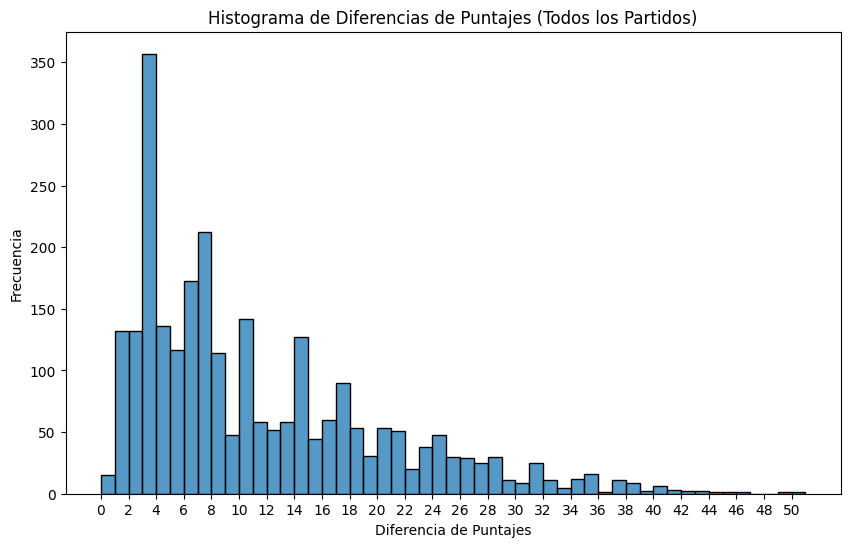

In [74]:
# prompt: hazme un histograma de diferencias de puntajes, pero detodos los partidos

# Recargar el DataFrame (si es necesario)
df = pd.read_csv('2017-2024_scores.csv')

# Calcular la diferencia de puntos para todos los partidos
df['ScoreDifference'] = abs(df['AwayScore'] - df['HomeScore'])

# Crear el histograma de las diferencias de puntos
plt.figure(figsize=(10, 6))
sns.histplot(df['ScoreDifference'], bins=range(0, int(df['ScoreDifference'].max()) + 2, 1), kde=False)  # Usar bins para controlar la precisión
plt.title('Histograma de Diferencias de Puntajes (Todos los Partidos)')
plt.xlabel('Diferencia de Puntajes')
plt.ylabel('Frecuencia')
plt.xticks(range(0, int(df['ScoreDifference'].max()) + 2, 2)) # Ajustar las marcas del eje x
plt.show()


# Histograma diferencia puntajes playoffs

<ipython-input-75-21e575e4487c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playoff_df['ScoreDifference'] = abs(playoff_df['AwayScore'] - playoff_df['HomeScore'])


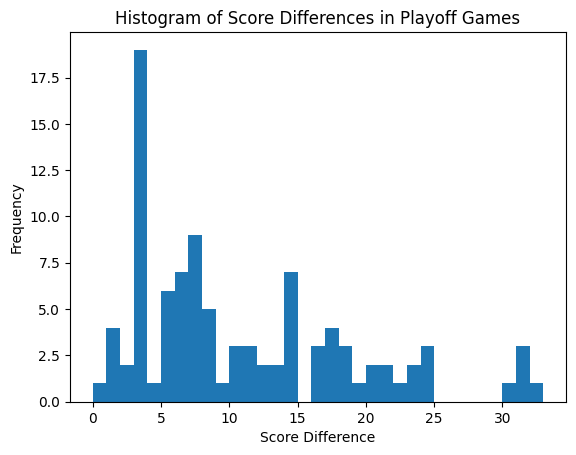

In [75]:
# Load the dataset
df = pd.read_csv('2017-2024_scores.csv')

# Filter for playoff games (including Super Bowl)
playoff_df = df[df["PostSeason"] == 1]  # Assuming "PostSeason" column indicates playoff games

# Calculate score differences for playoff games
playoff_df['ScoreDifference'] = abs(playoff_df['AwayScore'] - playoff_df['HomeScore'])

# Create the histogram
plt.hist(playoff_df['ScoreDifference'], bins=range(0, int(playoff_df['ScoreDifference'].max()) + 2, 1))
plt.title('Histogram of Score Differences in Playoff Games')
plt.xlabel('Score Difference')
plt.ylabel('Frequency')
plt.show()

# diferencias puntajes por equipo

In [71]:
# prompt: ahora crea dos data frames, y para cada uno quiero que eventualmente me muestres la score difference para todos los partidos en los que juege chiefs y su diferencia promedio (con su desvest), y que luego hagas lo mismo para los eagles

# Create a copy to avoid modifying the original DataFrame
chiefs_df = df.copy()
eagles_df = df.copy()

# Filter for games where Chiefs played
chiefs_df = chiefs_df[
    (chiefs_df["AwayTeam"] == "Chiefs") | (chiefs_df["HomeTeam"] == "Chiefs")
]

# Calculate score difference for Chiefs games
chiefs_df["ScoreDifference"] = np.where(
    chiefs_df["AwayTeam"] == "Chiefs",
    chiefs_df["AwayScore"] - chiefs_df["HomeScore"],
    chiefs_df["HomeScore"] - chiefs_df["AwayScore"],
)

# Print score difference for Chiefs games
print("Chiefs Score Differences:")
print(chiefs_df[["AwayTeam", "AwayScore", "HomeTeam", "HomeScore", "ScoreDifference"]])

# Calculate average and standard deviation of score difference for Chiefs
avg_chiefs_diff = chiefs_df["ScoreDifference"].mean()
std_chiefs_diff = chiefs_df["ScoreDifference"].std()

print(f"\nAverage Chiefs Score Difference: {avg_chiefs_diff:.2f}")
print(f"Standard Deviation of Chiefs Score Difference: {std_chiefs_diff:.2f}")

# Filter for games where Eagles played
eagles_df = eagles_df[
    (eagles_df["AwayTeam"] == "Eagles") | (eagles_df["HomeTeam"] == "Eagles")
]

# Calculate score difference for Eagles games
eagles_df["ScoreDifference"] = np.where(
    eagles_df["AwayTeam"] == "Eagles",
    eagles_df["AwayScore"] - eagles_df["HomeScore"],
    eagles_df["HomeScore"] - eagles_df["AwayScore"],
)

# Print score difference for Eagles games
print("\nEagles Score Differences:")
print(eagles_df[["AwayTeam", "AwayScore", "HomeTeam", "HomeScore", "ScoreDifference"]])

# Calculate average and standard deviation of score difference for Eagles
avg_eagles_diff = eagles_df["ScoreDifference"].mean()
std_eagles_diff = eagles_df["ScoreDifference"].std()

print(f"\nAverage Eagles Score Difference: {avg_eagles_diff:.2f}")
print(f"Standard Deviation of Eagles Score Difference: {std_eagles_diff:.2f}")


Chiefs Score Differences:
     AwayTeam  AwayScore  HomeTeam  HomeScore  ScoreDifference
11      49ers       27.0    Chiefs       17.0            -10.0
22     Chiefs       30.0   Bengals       12.0             18.0
36     Chiefs       13.0  Seahawks       26.0            -13.0
60     Titans        6.0    Chiefs       30.0             24.0
65     Chiefs       42.0  Patriots       27.0             15.0
...       ...        ...       ...        ...              ...
2816   Chiefs       29.0  Steelers       10.0             19.0
2843   Chiefs        0.0   Broncos       38.0            -38.0
2854   Texans       14.0    Chiefs       23.0              9.0
2859    Bills       29.0    Chiefs       32.0              3.0
2860   Chiefs        0.0    Eagles        0.0              0.0

[186 rows x 5 columns]

Average Chiefs Score Difference: 5.81
Standard Deviation of Chiefs Score Difference: 11.41

Eagles Score Differences:
        AwayTeam  AwayScore  HomeTeam  HomeScore  ScoreDifference
8        

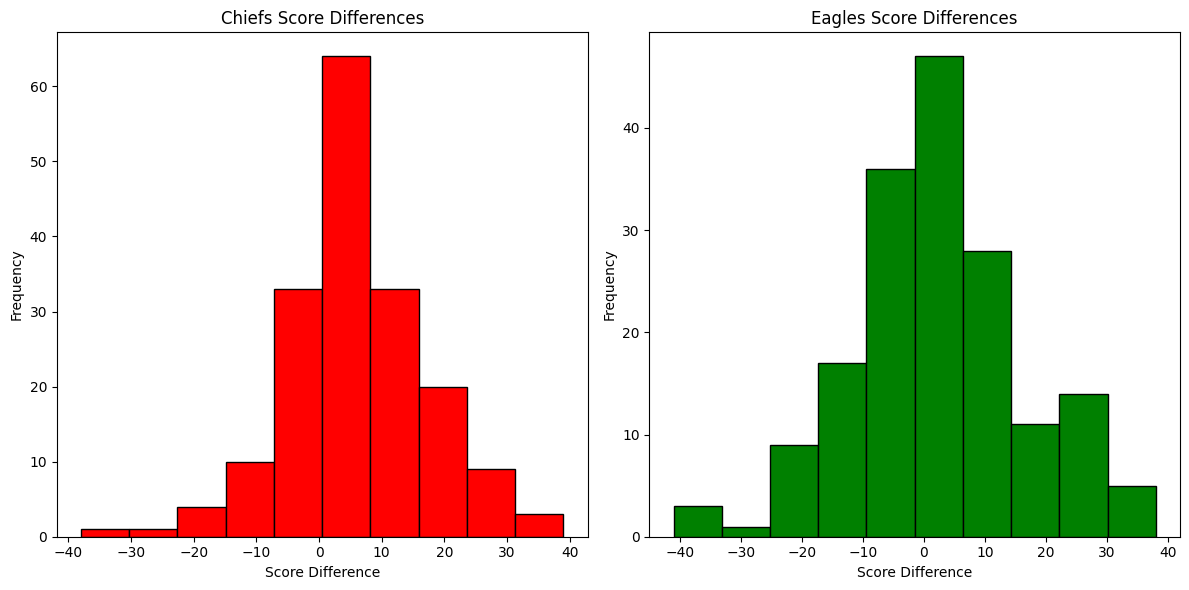

In [72]:

# Load the dataset
df = pd.read_csv('2017-2024_scores.csv')

# Create a copy to avoid modifying the original DataFrame
chiefs_df = df.copy()
eagles_df = df.copy()

# Filter for games where Chiefs played
chiefs_df = chiefs_df[(chiefs_df["AwayTeam"] == "Chiefs") | (chiefs_df["HomeTeam"] == "Chiefs")]

# Calculate score difference for Chiefs games
chiefs_df["ScoreDifference"] = np.where(
    chiefs_df["AwayTeam"] == "Chiefs",
    chiefs_df["AwayScore"] - chiefs_df["HomeScore"],
    chiefs_df["HomeScore"] - chiefs_df["AwayScore"],
)

# Filter for games where Eagles played
eagles_df = eagles_df[(eagles_df["AwayTeam"] == "Eagles") | (eagles_df["HomeTeam"] == "Eagles")]

# Calculate score difference for Eagles games
eagles_df["ScoreDifference"] = np.where(
    eagles_df["AwayTeam"] == "Eagles",
    eagles_df["AwayScore"] - eagles_df["HomeScore"],
    eagles_df["HomeScore"] - eagles_df["AwayScore"],
)

# Create histograms of score differences
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.hist(chiefs_df["ScoreDifference"], bins=10, color='red', edgecolor='black')
plt.title("Chiefs Score Differences")
plt.xlabel("Score Difference")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.hist(eagles_df["ScoreDifference"], bins=10, color='green', edgecolor='black')
plt.title("Eagles Score Differences")
plt.xlabel("Score Difference")
plt.ylabel("Frequency")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

# Conclusiones
La verdad lo dejaré por la paz. No tengo mucho tiempo para esto. Me terminé tardando casi 2 horas y media, y entonces basaré mi predicción en diferencias regulares (las finales de los superbowl han sido caóticas los últimos años, desde 13-3 hasta 41-38 y cosas así)

Además, Chiefs tiene 4 SBs mientras que Eagles tiene 5. Por tanto, me iré por los Chiefs :)

- Examinando las diferencias de scores de los ultimos superbowls, por lo general son igual o menores a 10 puntos. Solo hubo uno de 22 puntos, pero meh.

- Lo agarraré de entre 10 y 40, para no irme por valores menos probables.

- Wow, vaya que las diferencias de 3 puntos son super comunes. Me iré por esa diferencia
- Si bien un puntaje de 31 es el que más ocurre en playoffs, el 30 y el 32 para nada, en cambio los rangos entre 20 y 25 están más solidos. ocurren más veces sumados. Besides, las diferencias entre el 31 y alguno del rango 20-25 es de 3-5 puntos en general, entonces tmp es tan descabellado irse por ese rango
- considerando esa diferencia, y algo que me dice que me vaya por 25-22:

Mi predicción es que el marcador será:

**Chiefs 25 - 22 Eagles**
